In [ ]:
'''import kagglehub

# Download latest version
path = kagglehub.dataset_download("divyansh22/summer-olympics-medals")

print("Path to dataset files:", path)'''

In [6]:
#Impot libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#Import Exploration Cleanup Data

df = pd.read_csv('E:\\Projects\\Summer-Olympics-Medals\\Summer-Olympic-medals-1976-to-2008.csv', encoding='latin-1')

df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [28]:
df.shape

(15433, 11)

In [29]:
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [30]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [31]:
df['Year'].unique()

array([1976.,   nan, 1980., 1984., 1988., 1992., 1996., 2000., 2004.,
       2008.])

In [32]:
df['City'].unique()

array(['Montreal', nan, 'Moscow', 'Los Angeles', 'Seoul', 'Barcelona',
       'Atlanta', 'Sydney', 'Athens', 'Beijing'], dtype=object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [34]:
df[df.isnull().any(axis=1)]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [36]:
#Cleanup Data and Remoce Null Values

df.dropna(inplace=True)
df.shape

(15316, 11)

In [37]:
athlete_per_year = df.Year.value_counts()
athlete_per_year

Year
2008.0    2042
2000.0    2015
2004.0    1998
1996.0    1859
1992.0    1705
1988.0    1546
1984.0    1459
1980.0    1387
1976.0    1305
Name: count, dtype: int64

In [38]:
number_of_athlete_by_year = athlete_per_year.sort_index()
number_of_athlete_by_year

Year
1976.0    1305
1980.0    1387
1984.0    1459
1988.0    1546
1992.0    1705
1996.0    1859
2000.0    2015
2004.0    1998
2008.0    2042
Name: count, dtype: int64

In [39]:
# List all available countries in the dataset
print(df['Country'].dropna().unique())

['East Germany' 'Soviet Union' 'United States' 'Italy' 'Sweden'
 'Australia' 'Canada' 'West Germany' 'Netherlands' 'United Kingdom'
 'Hungary' 'Japan' 'Cuba' 'Poland' 'Bulgaria' 'New Zealand' 'Belgium'
 'Mexico' 'Jamaica' 'Finland' 'Romania' 'Portugal' 'France' 'Brazil'
 'Czechoslovakia' 'Trinidad and Tobago' 'Yugoslavia' 'Venezuela'
 'Puerto Rico*' 'Korea, North' 'Bermuda*' 'Thailand' 'Spain' 'Denmark'
 'Switzerland' 'Pakistan' 'Korea, South' 'Norway' 'Austria' 'Iran'
 'Mongolia' 'Ethiopia' 'Tanzania' 'Guyana' 'Uganda' 'Ireland' 'India'
 'Zimbabwe' 'Greece' 'Lebanon' 'China' 'Nigeria' 'Kenya' 'Morocco'
 "Cote d'Ivoire" 'Algeria' 'Turkey' 'Cameroon' 'Zambia'
 'Dominican Republic' 'Iceland' 'Egypt' 'Colombia' 'Peru' 'Taiwan' 'Syria'
 'Costa Rica' 'Suriname' 'Indonesia' 'Djibouti' 'Senegal' 'Philippines'
 'Netherlands Antilles*' 'Virgin Islands*' 'Chile' 'Argentina'
 'Unified team' 'Germany' 'Bahamas' 'South Africa' 'Namibia' 'Qatar'
 'Lithuania' 'Malaysia' 'Croatia' 'Latvia' 'Estonia' '

Text(0, 0.5, 'No. of Athletes')

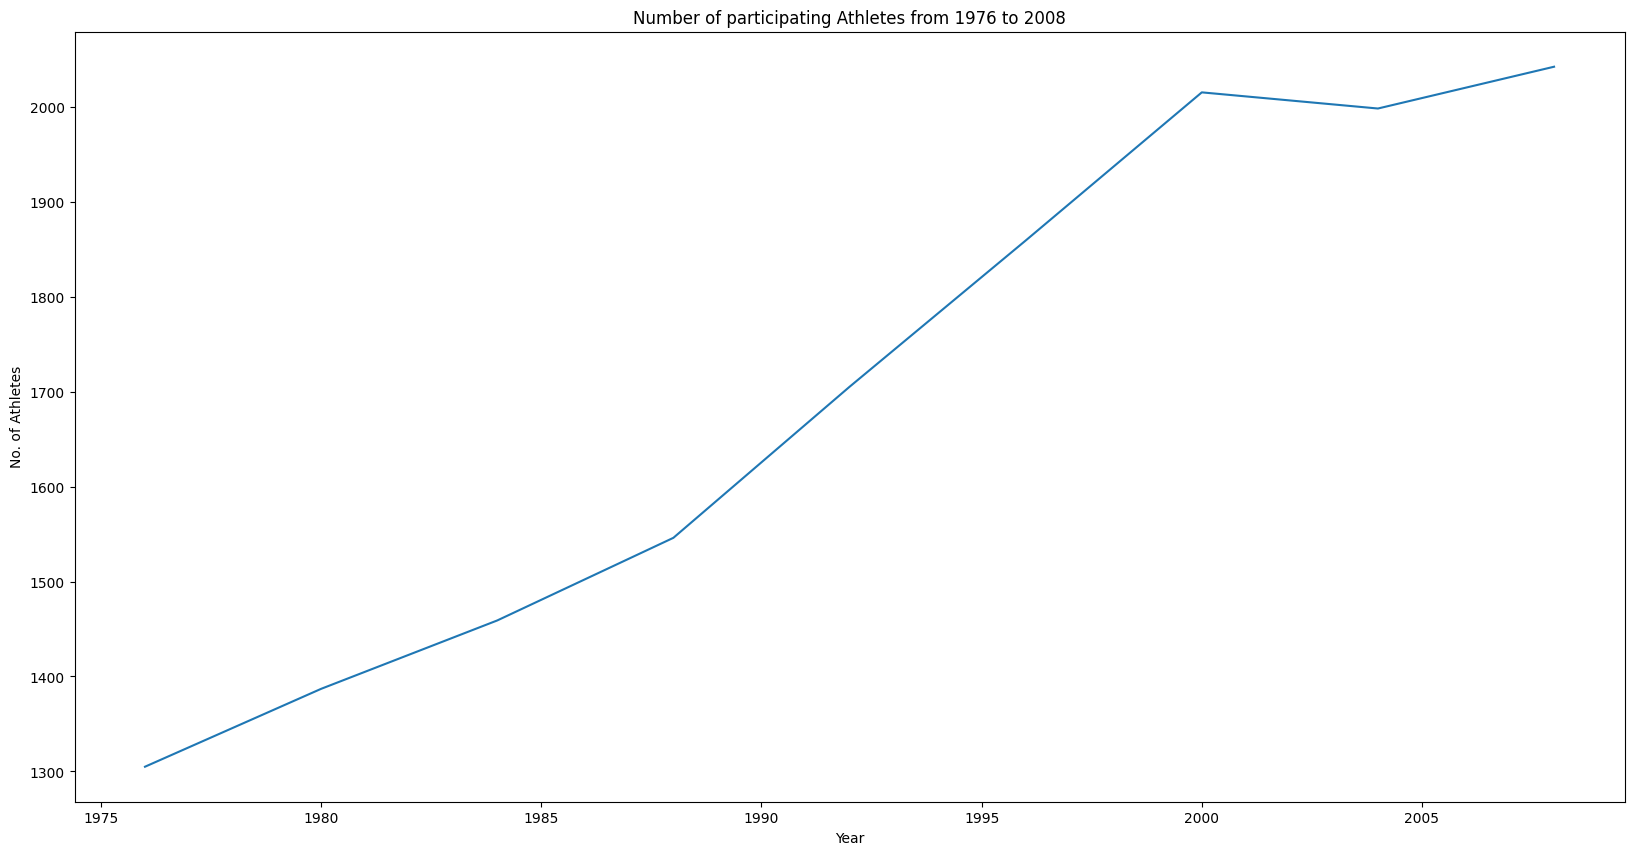

In [40]:
plt.figure(figsize=(20,10))
number_of_athlete_by_year.plot()
plt.title('Number of participating Athletes from 1976 to 2008')
plt.xlabel('Year')
plt.ylabel('No. of Athletes')

In [41]:
gender_grouped_by_men = df[['Year', 'Gender', 'Medal']][df['Gender'] == 'Men'].groupby(['Year', 'Gender']).count()
gender_grouped_by_women = df[['Year', 'Gender', 'Medal']][df['Gender'] == 'Women'].groupby(['Year', 'Gender']).count()

pd.merge(gender_grouped_by_men, gender_grouped_by_women, how='inner', on='Year', suffixes=('_men', '_women'))

,Medal_men,Medal_women
Year,,
1976.0,924,381
1980.0,958,429
1984.0,973,486
1988.0,1011,535
1992.0,1105,600
1996.0,1082,777
2000.0,1126,889
2004.0,1099,899
2008.0,1110,932


Text(0.5, 1.0, 'Participants by Gender over Time')

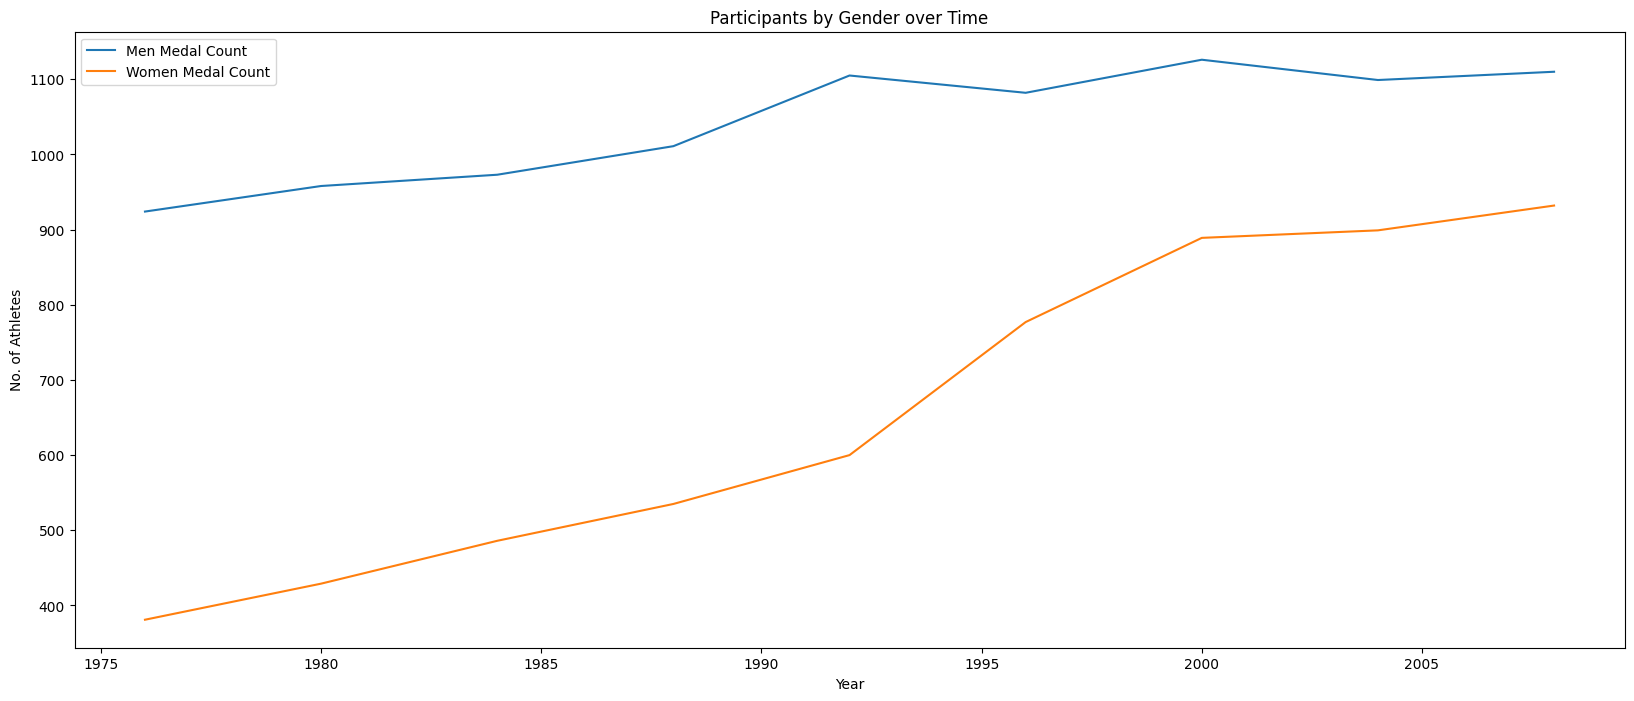

In [42]:
pd.merge(gender_grouped_by_men, gender_grouped_by_women, how='inner', on='Year', suffixes=('_men', '_women')).rename(columns={'Medal_men':'Men Medal Count', 'Medal_women':'Women Medal Count'}).plot(figsize=(20,8))
plt.ylabel('No. of Athletes')
plt.title('Participants by Gender over Time')

Text(0.5, 1.0, 'All Time Medals of the top 25 Countries')

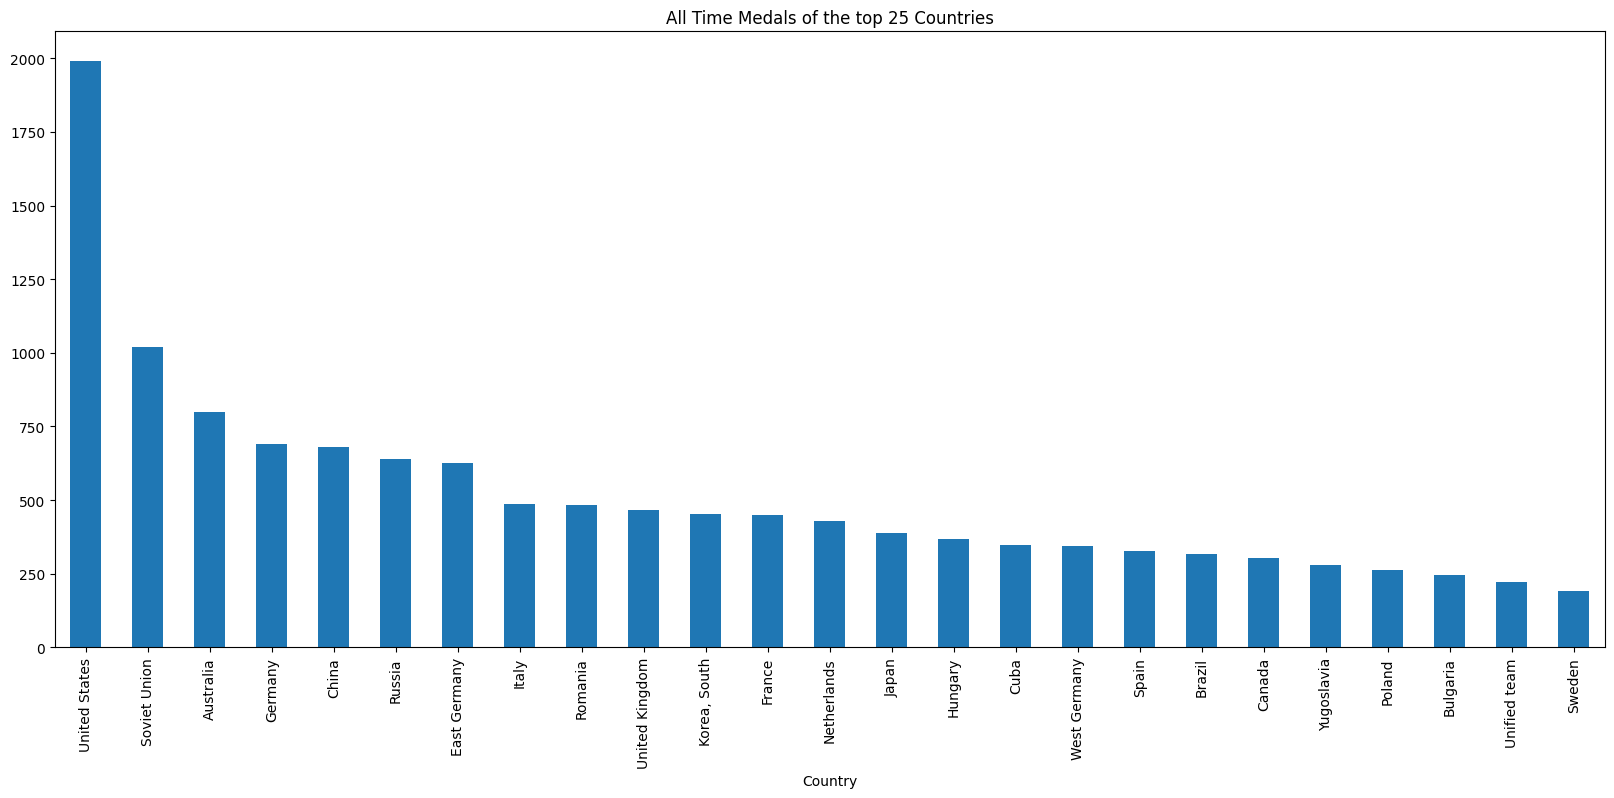

In [43]:
df = df['Country'].value_counts().sort_values(ascending=False)
all_countries = df[:25]
all_countries.plot(kind='bar', figsize=(20,8))
plt.title('All Time Medals of the top 25 Countries')

C:\Users\USER\AppData\Local\Temp\ipykernel_10776\2609631834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medal_counts.head(10), x='Country', y='Medal', palette='viridis')


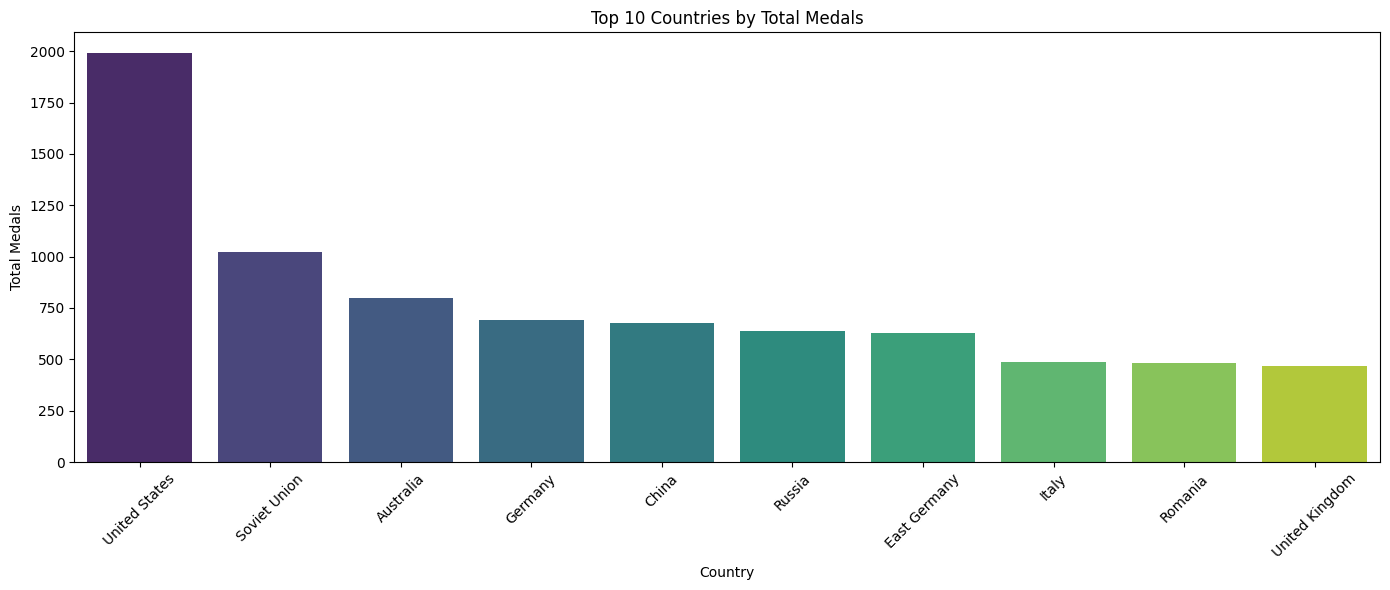

In [51]:
# Total Medal Count by Country
medal_counts = df.groupby('Country')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(data=medal_counts.head(10), x='Country', y='Medal', palette='viridis')
plt.title('Top 10 Countries by Total Medals')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_10776\4062814252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_counts.values, y=sport_counts.index, palette='coolwarm')


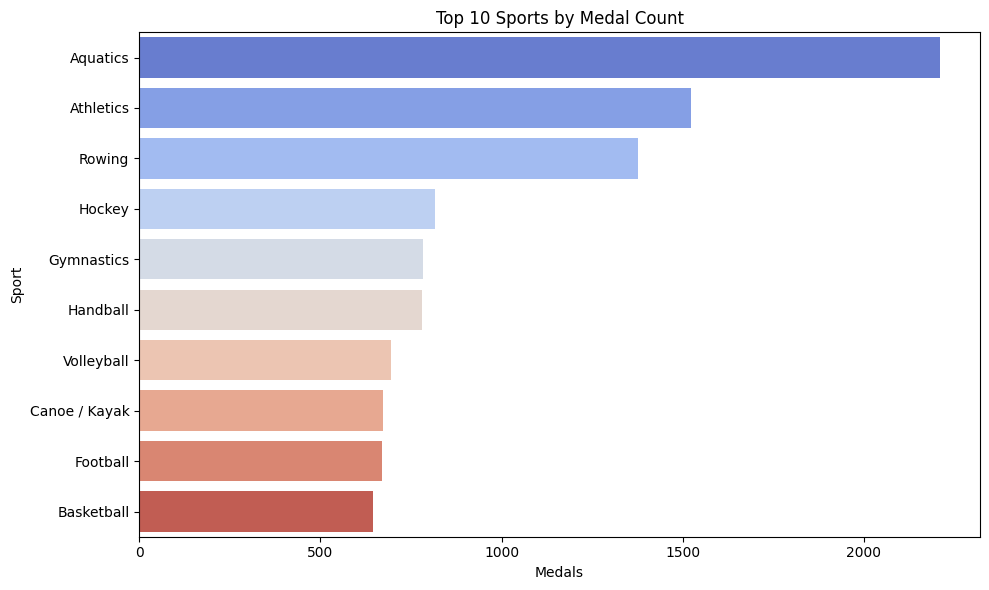

In [ ]:
#Medal Distribution by Sport
sport_counts = df['Sport'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=sport_counts.values, y=sport_counts.index, palette='coolwarm')
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Medals')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10776\2491331896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_athletes.values, y=top_athletes.index, palette='magma')


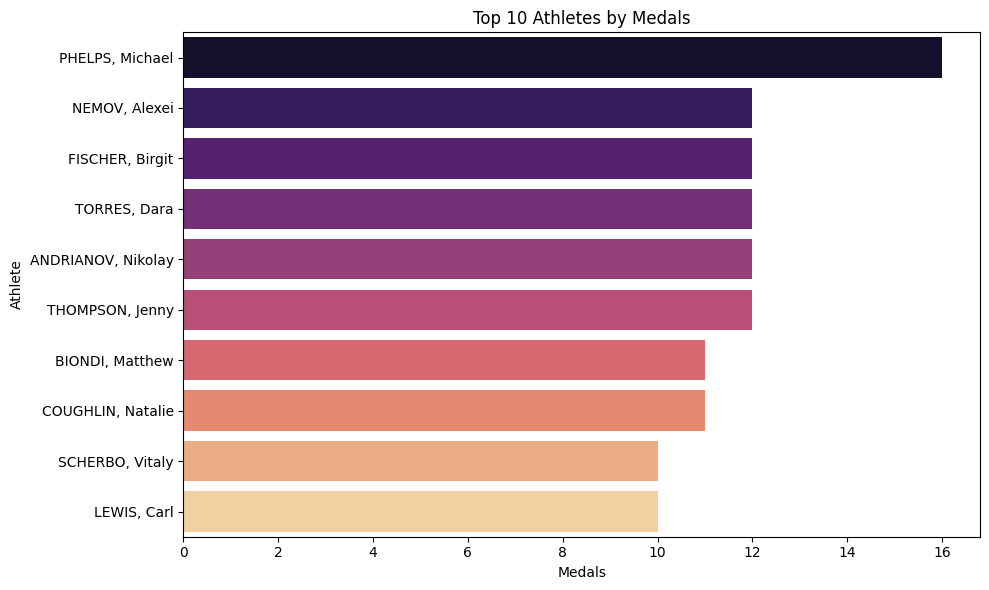

In [52]:
#Most Decorated Athletes
top_athletes = df['Athlete'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_athletes.values, y=top_athletes.index, palette='magma')
plt.title('Top 10 Athletes by Medals')
plt.xlabel('Medals')
plt.tight_layout()
plt.show()

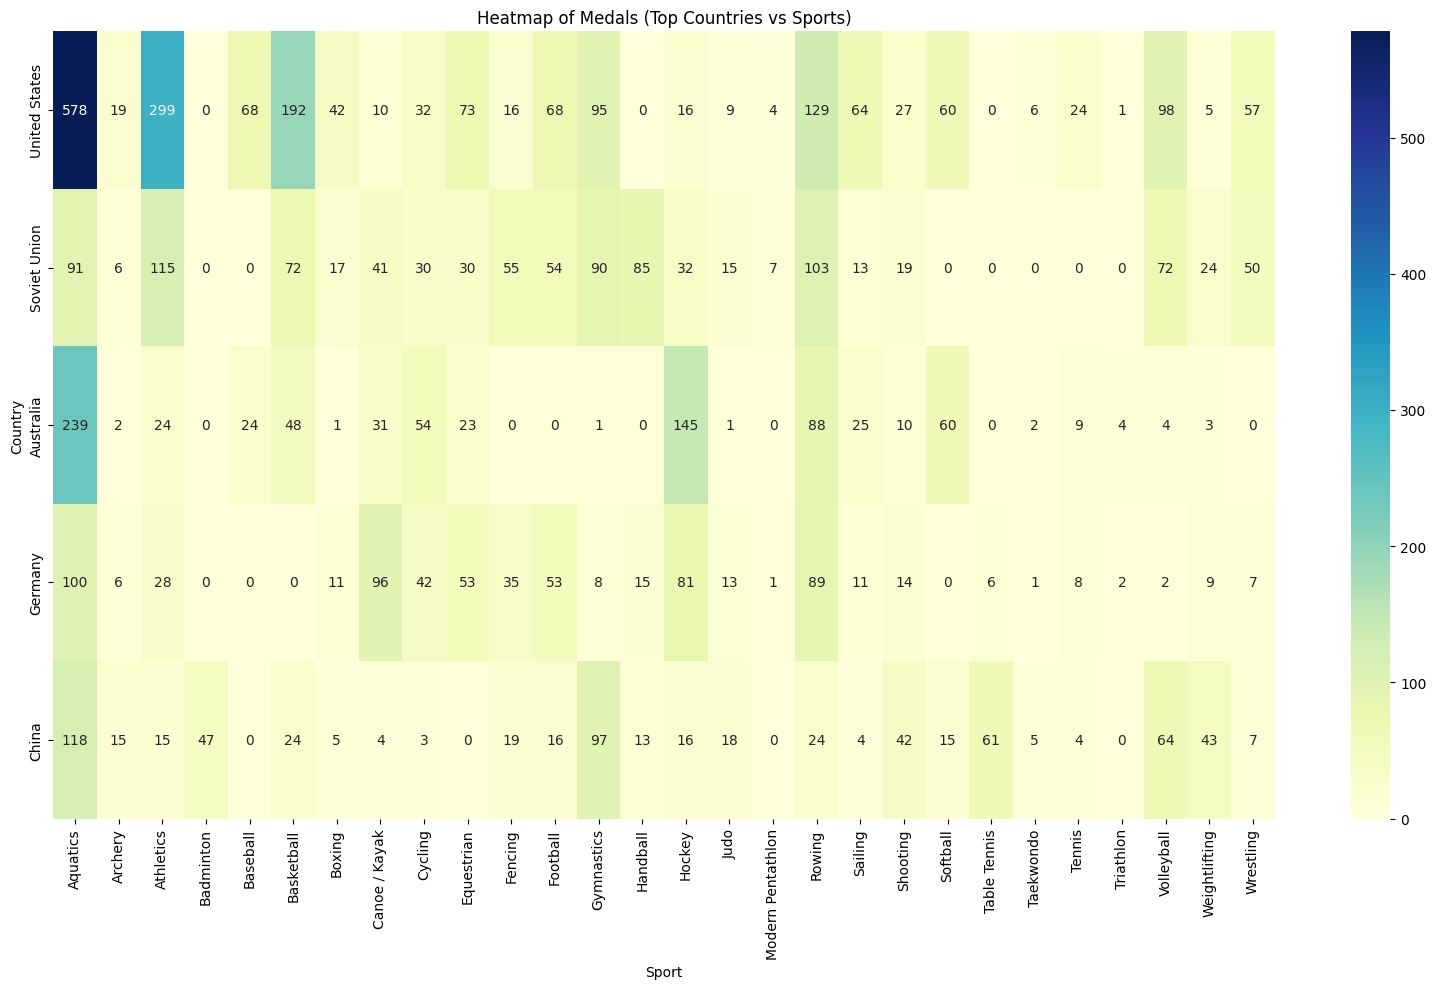

In [53]:
#Heatmap: Country vs Sport
pivot_table = df.pivot_table(index='Country', columns='Sport', values='Medal', aggfunc='count', fill_value=0)
plt.figure(figsize=(16,10))
sns.heatmap(pivot_table.loc[top_countries], annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Medals (Top Countries vs Sports)')
plt.tight_layout()
plt.show()

In [ ]:
# 🎯 Prediction Model: Predicting Medal Counts by Country-Year

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Prepare the data
medal_year_country = df.groupby(['Year', 'Country'])['Medal'].count().reset_index()
medal_year_country.rename(columns={'Medal': 'Medal_Count'}, inplace=True)

In [55]:
# Encode the 'Country' column
le = LabelEncoder()
medal_year_country['Country_Code'] = le.fit_transform(medal_year_country['Country'])

In [56]:
# Features and target
X = medal_year_country[['Year', 'Country_Code']]
y = medal_year_country['Medal_Count']

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Evaluate the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3213.15785880273
R² Score: 0.018858425668237477


In [58]:
#Make Predictions
if 'United States' in le.classes_:
    usa_code = le.transform(['United States'])[0]

    # 🧠 Predict medal count for USA in future years
    future_years = pd.DataFrame({
        'Year': [2012, 2016, 2020],
        'Country_Code': [usa_code] * 3
    })

    predictions = model.predict(future_years)

    for year, pred in zip(future_years['Year'], predictions):
        print(f"Predicted medals for USA in {year}: {round(pred)}")

else:
    print("❌ 'USA' not found in training data. Please choose another country from:", le.classes_)

Predicted medals for USA in 2012: 27
Predicted medals for USA in 2016: 26
Predicted medals for USA in 2020: 25


In [59]:
# Save clean version
df.to_csv("olympics_data.csv", index=False)
print("✅ Clean data saved to olympics_data.csv")

✅ Clean data saved to olympics_data.csv
